In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import figure
sns.set(rc={'figure.figsize':(13.0,10.0)})

# 1. Data load and basic exploration

In [3]:
df = pd.read_csv('Mass shootings.zip', compression='zip')

In [4]:
df.head()

,Date,City,State,Dead,Injured,Total,Description
0,2022-07-07,Chicago,Illinois,0,4,4,Four people were wounded in a drive-by shootin...
1,2022-07-06,Tampa,Florida,0,4,4,Four people were shot at an intersection in th...
2,2022-07-06,Chicago,Illinois,0,4,4,Four people were shot after three men got out ...
3,2022-07-06,St. Cloud,Minnesota,0,4,4,An argument in an alleyway escalated into a sh...
4,2022-07-05,Youngstown,Ohio,1,3,4,"Four people were shot, one fatally, in the par..."


In [5]:
df.shape

(2647, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2647 entries, 0 to 2646
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2647 non-null   object
 1   City         2647 non-null   object
 2   State        2642 non-null   object
 3   Dead         2647 non-null   int64 
 4   Injured      2647 non-null   int64 
 5   Total        2647 non-null   int64 
 6   Description  2647 non-null   object
dtypes: int64(3), object(4)
memory usage: 144.9+ KB


# 2. Getting inisghits by grouping

### 2.1 Total number of killed and injured people by each state

In [ ]:
tot_by_state = df.groupby(['State'], as_index=False)\
    .agg({'Total':'sum'})\
    .sort_values('Total', ascending=False)
tot_by_state.head()

### 2.2 Total number of killed and injured people by each city

In [53]:
tot_by_city = df.groupby(['City'], as_index=False)\
    .agg({'Total':'sum'})\
    .sort_values('Total', ascending=False)
tot_by_city.head()

,City,Total
138,Chicago,983
593,Paradise,479
612,Philadelphia,402
548,New York City,344
381,Houston,250


### 2.3 Get the mortality rate for each observation and then group it by state 

In [11]:
df['Mortality'] = round(df['Dead']/df['Total'] * 100, 2)

In [12]:
df.head()

,Date,City,State,Dead,Injured,Total,Description,Mortality
0,2022-07-07,Chicago,Illinois,0,4,4,Four people were wounded in a drive-by shootin...,0.0
1,2022-07-06,Tampa,Florida,0,4,4,Four people were shot at an intersection in th...,0.0
2,2022-07-06,Chicago,Illinois,0,4,4,Four people were shot after three men got out ...,0.0
3,2022-07-06,St. Cloud,Minnesota,0,4,4,An argument in an alleyway escalated into a sh...,0.0
4,2022-07-05,Youngstown,Ohio,1,3,4,"Four people were shot, one fatally, in the par...",25.0


In [59]:
avg_mortality = df.groupby('State', as_index=False)[['Mortality']]\
    .mean()\
    .rename(columns={'Mortality':'Avg Mortality'})\
    .sort_values('Avg Mortality', ascending=False)
avg_mortality['Avg Mortality'] = round(avg_mortality['Avg Mortality'], 2)
avg_mortality.head()

,State,Avg Mortality
41,Pennsylvania Jenkins Township,92.86
43,Puerto Rico,87.86
45,Robinson Township,83.33
21,Maine,75.00
12,Hawaii,75.00


### 2.4 The most dangerous cities for each state by number of killed and injured

In [15]:
top3_by_state = df.groupby(['State', 'City'], as_index=False)\
    .agg({'Total':'sum'})\
    .sort_values(['State', 'Total'], ascending=[True, False])\
    .groupby('State',as_index=False).head(3)

### 2.5 The numbers for each year and each month

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name(locale='English')

In [18]:
year_tot = df.groupby('Year', as_index=False).agg({'Total':'sum'})

In [19]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_tot = df.groupby('Month').agg({'Total':'sum'})
months_tot = months_tot.reindex(new_order, axis=0)

### 2.6 The most common places where shootings occur

In [20]:
places = ['home', 'school', 'bar', 'park ', ' market', 'supermarket', 'parking', 'neighborhood', 'nightclub', 'gas station', 'party', 'hotel', 'motel']
places_count = {}
for i in places:
    for d in df.Description:
        if i in d.lower():
            places_count[i] = places_count.get(i, 0) + 1

In [23]:
places_count
places_count['market/supermarket'] = 14
places_count['hotel/motel'] = 24
del places_count[' market'], places_count['supermarket'], places_count['hotel'], places_count['motel']

In [126]:
places_num = pd.DataFrame(places_count.items(), columns=['Place', 'Occurrences']).sort_values('Occurrences', ascending=False)
places_num

,Place,Occurrences
8,party,307
5,neighborhood,220
0,home,208
2,bar,134
3,park,78
6,nightclub,78
4,parking,73
1,school,64
7,gas station,36
10,hotel/motel,24


### 2.7 Times of the day when shootings happen

In [25]:
time = ['morning', 'afternoon', 'evening']
time_count = {}
for i in time:
    for d in df.Description:
        if i in d.lower():
            time_count[i] = time_count.get(i, 0) + 1

In [119]:
time_num = pd.DataFrame(time_count.items(), columns=['Time', 'Occurrences'])
time_num

,Time,Occurrences
0,morning,274
1,afternoon,24
2,evening,65


# 3. Visualization part

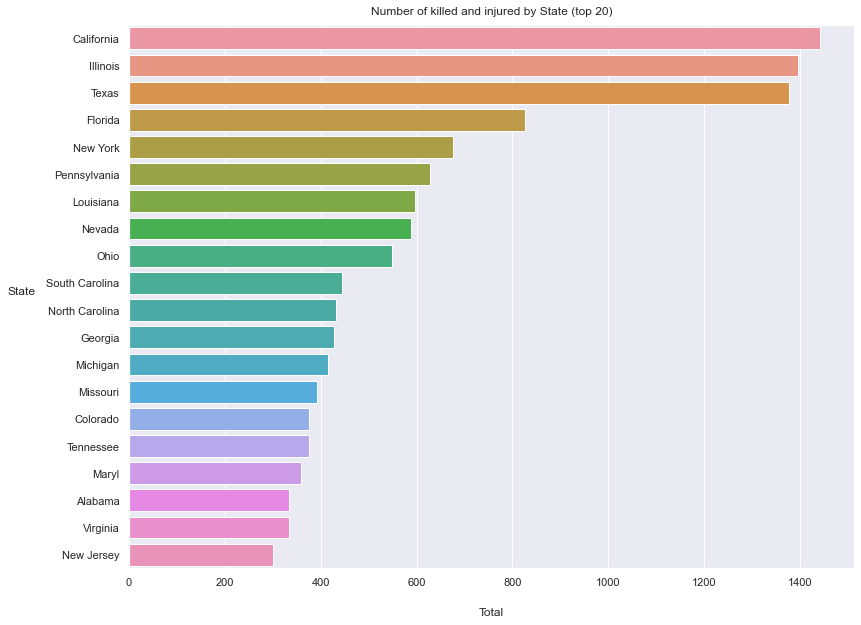

In [129]:
sns.barplot(x='Total', y = tot_by_state.State.head(20), data=tot_by_state)
plt.title('Number of killed and injured by State (top 20)', pad=10)
plt.xlabel('Killed and Injured')
plt.ylabel('State', rotation=360, labelpad=25)
plt.xlabel('Total', labelpad=20);

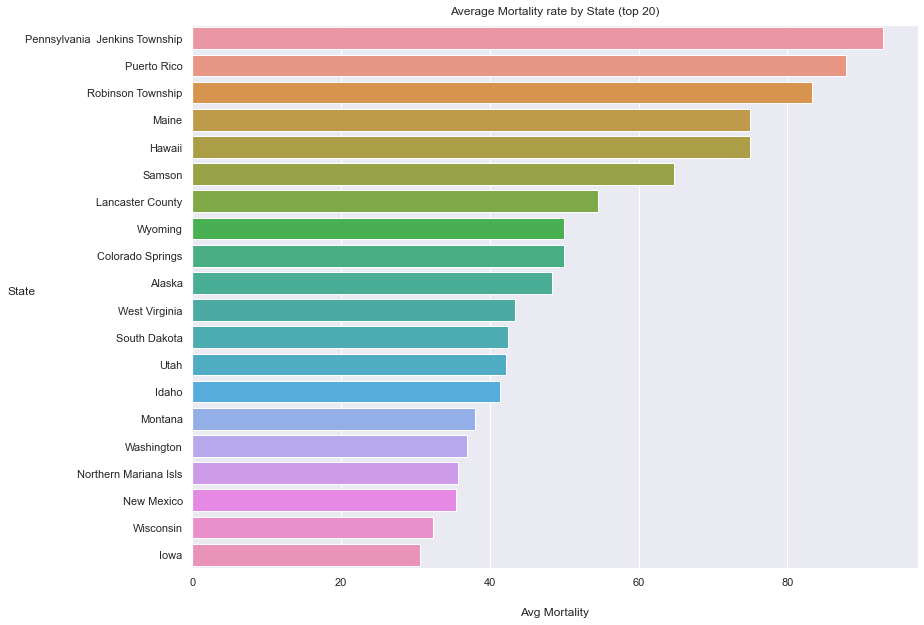

In [130]:
sns.barplot(x='Avg Mortality', y=avg_mortality['State'].head(20), data=avg_mortality)
plt.title('Average Mortality rate by State (top 20)', pad=10)
plt.ylabel('State', rotation=360)
plt.xlabel('Avg Mortality', labelpad=20);

## Here it can be seen that if the state is in the top of mortality rate, it does not mean that it is one of the most dangerous. Many among the states, with least number of killed and injured people, are in the top of mortality rate.

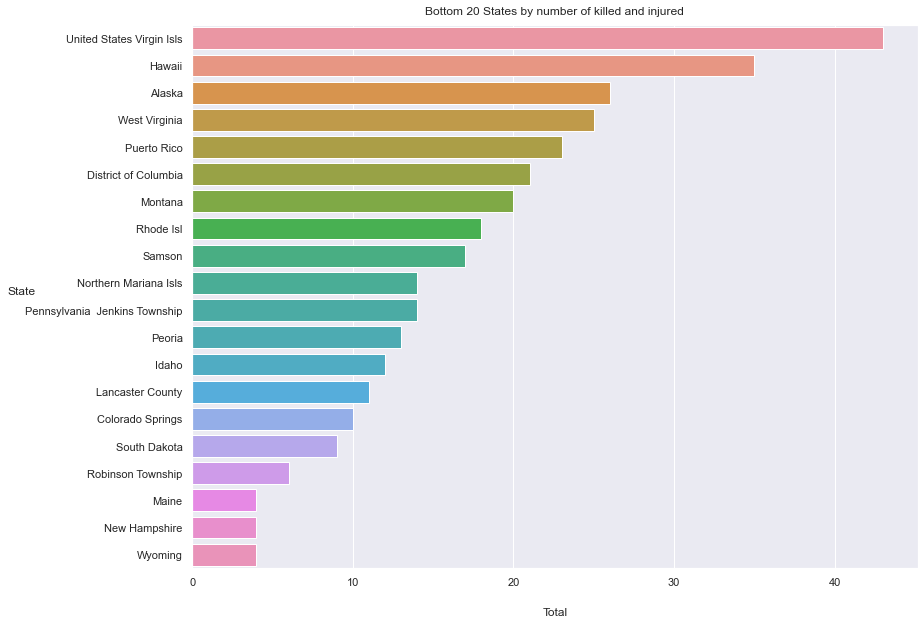

In [131]:
sns.barplot(x='Total', y=tot_by_state['State'].tail(20), data=tot_by_state)
plt.title('Bottom 20 States by number of killed and injured', pad=10)
plt.ylabel('State', rotation=360)
plt.xlabel('Total', labelpad=20);

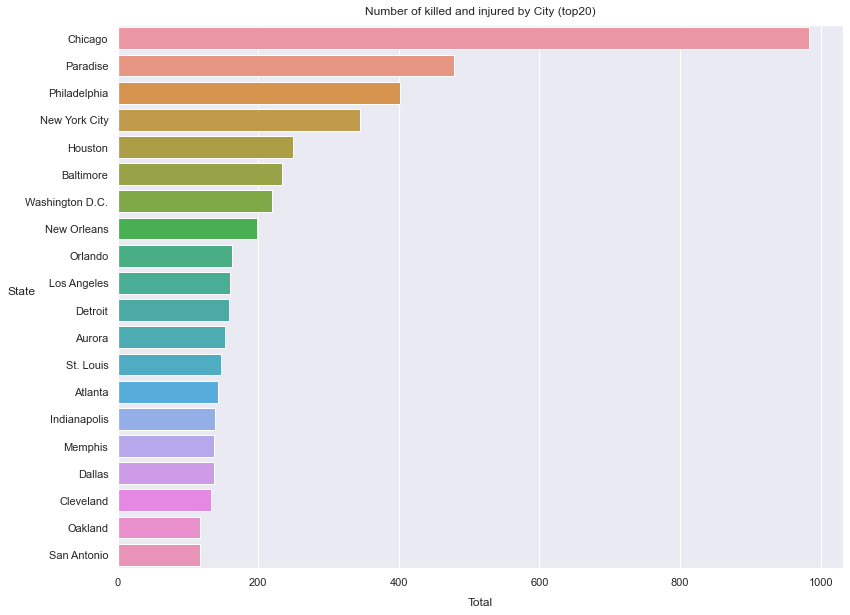

In [132]:
sns.barplot(x='Total', y=tot_by_city.City.head(20), data=tot_by_city)
plt.title('Number of killed and injured by City (top20)', pad=10)
plt.ylabel('State', rotation=360)
plt.xlabel('Total', labelpad=10);

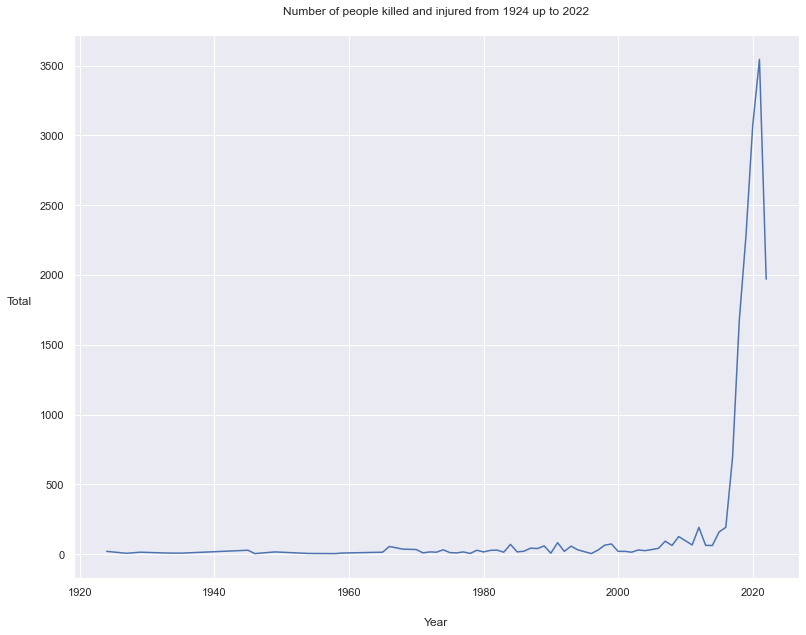

In [133]:
sns.lineplot(x='Year', y='Total', data=year_tot)
plt.title('Number of people killed and injured from 1924 up to 2022', pad=20)
plt.xlabel('Year', labelpad=20)
plt.ylabel('Total', labelpad=20, rotation=360);

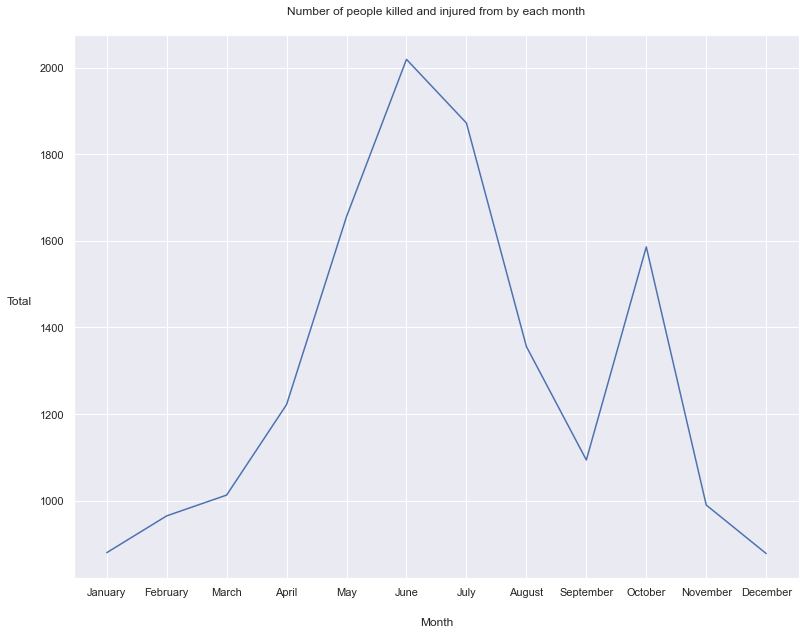

In [134]:
sns.lineplot(x='Month', y='Total', data=months_tot)
plt.title('Number of people killed and injured from by each month', pad=20)
plt.xlabel('Month', labelpad=20)
plt.ylabel('Total', labelpad=20, rotation=360);

## It needs to be clarified that morning here is considered from overnight to 12 pm

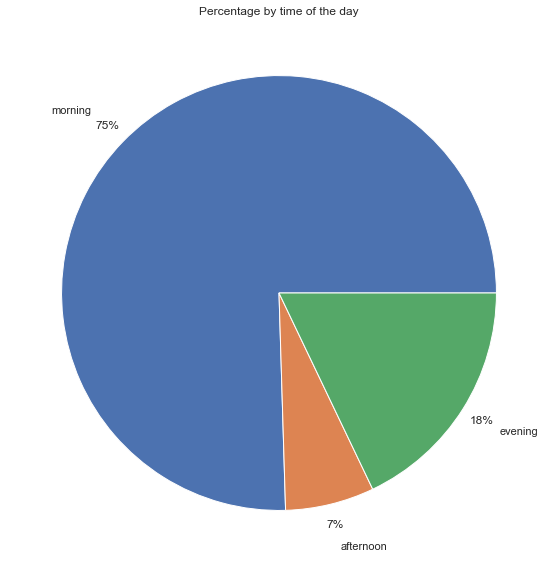

In [135]:
plt.pie(time_num.Occurrences, labels=time_num.Time,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Percentage by time of the day');

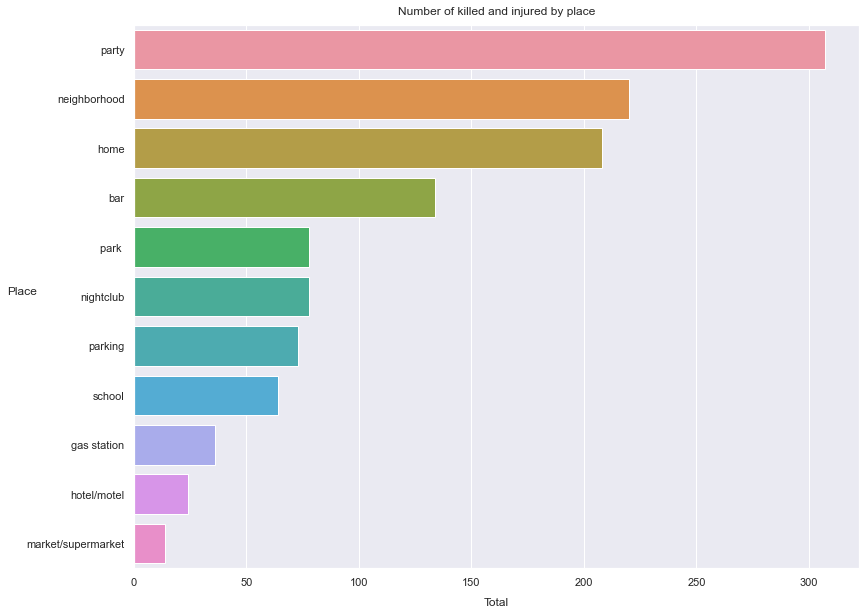

In [136]:
sns.barplot(x='Occurrences', y=places_num.Place, data=places_num)
plt.title('Number of killed and injured by place', pad=10)
plt.ylabel('Place', rotation=360)
plt.xlabel('Total', labelpad=10);